<a href="https://colab.research.google.com/github/himalachudel/FDSFE_HAcharya/blob/main/ClassroomcodingsCopy_of_FDSfE_logistic_regression_12Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/ml/datasets/bank+marketing#

Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Input variables:
bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
import pandas as pd

In [5]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 138.5+ KB


In [7]:
bank["y"].unique()

array(['no', 'yes'], dtype=object)

In [8]:
bank["target"] = (bank["y"] == "yes").astype(int)

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no,0
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no,0
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no,0
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no,0
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes,1
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes,1
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes,1
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes,1


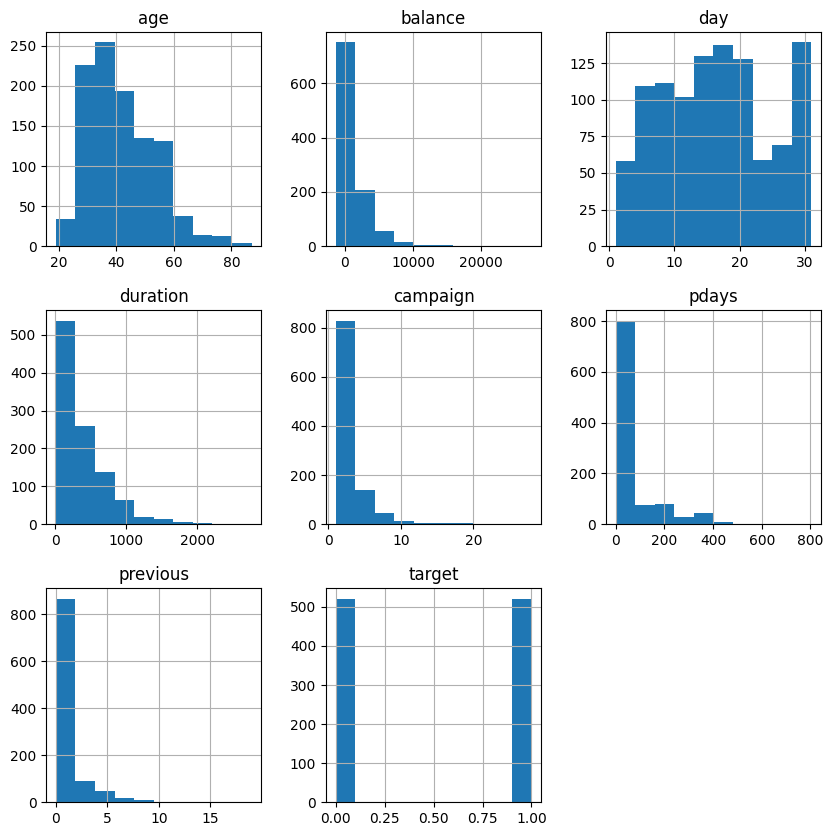

In [10]:
bank.hist(figsize=(10,10));

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'target'],
      dtype='object')

In [12]:
cols = ["age", "balance", "duration", "marital"]
features = bank[cols].copy()
target = bank["target"]

In [13]:
features

,age,balance,duration,marital
0,38,1663,217,married
1,38,595,245,divorced
2,34,360,46,married
3,60,1025,388,married
4,42,520,158,married
...,...,...,...,...
1037,26,668,576,single
1038,60,362,816,married
1039,42,1080,951,single
1040,32,620,1234,single


In [14]:
target

0       0
1       0
2       0
3       0
4       0
       ..
1037    1
1038    1
1039    1
1040    1
1041    1
Name: target, Length: 1042, dtype: int64

# One-Hot Encoding

In [15]:
features["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [16]:
pd.get_dummies(features['marital'], prefix='marital')

,marital_divorced,marital_married,marital_single
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1037,0,0,1
1038,0,1,0
1039,0,0,1
1040,0,0,1


In [17]:
features.join(pd.get_dummies(features['marital'], prefix='marital'))

,age,balance,duration,marital,marital_divorced,marital_married,marital_single
0,38,1663,217,married,0,1,0
1,38,595,245,divorced,1,0,0
2,34,360,46,married,0,1,0
3,60,1025,388,married,0,1,0
4,42,520,158,married,0,1,0
...,...,...,...,...,...,...,...
1037,26,668,576,single,0,0,1
1038,60,362,816,married,0,1,0
1039,42,1080,951,single,0,0,1
1040,32,620,1234,single,0,0,1


In [18]:
features.join(pd.get_dummies(features['marital'], prefix='marital')).drop(columns=['marital'])

,age,balance,duration,marital_divorced,marital_married,marital_single
0,38,1663,217,0,1,0
1,38,595,245,1,0,0
2,34,360,46,0,1,0
3,60,1025,388,0,1,0
4,42,520,158,0,1,0
...,...,...,...,...,...,...
1037,26,668,576,0,0,1
1038,60,362,816,0,1,0
1039,42,1080,951,0,0,1
1040,32,620,1234,0,0,1


In [19]:
features = features.join(pd.get_dummies(features['marital'], prefix='marital')).drop(columns=['marital'])

# Min-Max Normalization

(array - min(array)) / (max(array) - min(array))

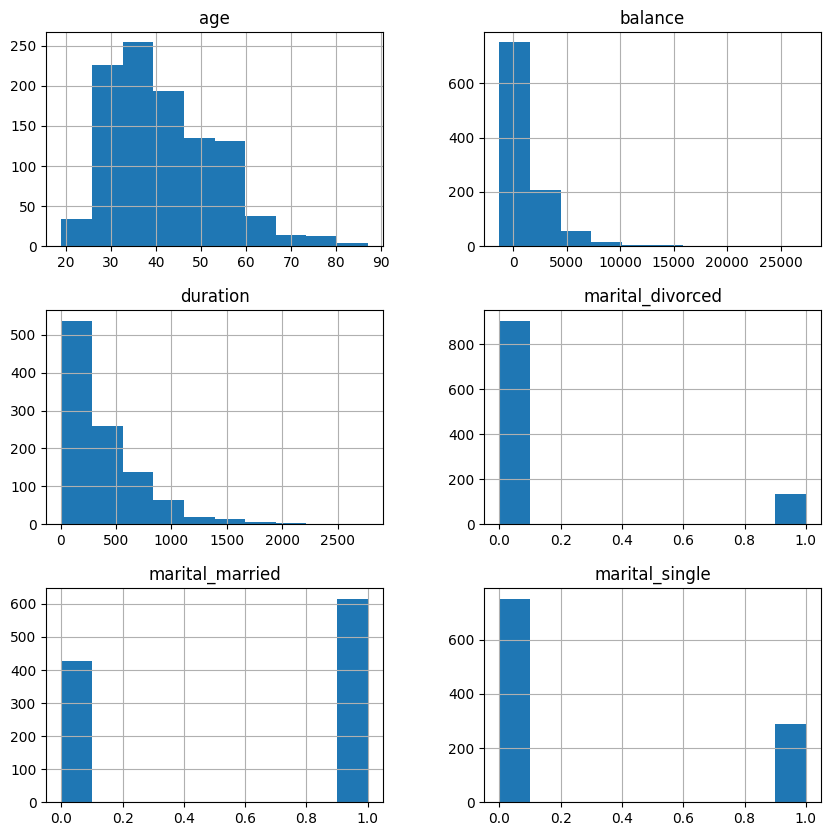

In [20]:
features.hist(figsize=(10,10));

In [21]:
features = (features - features.min()) / (features.max() - features.min())

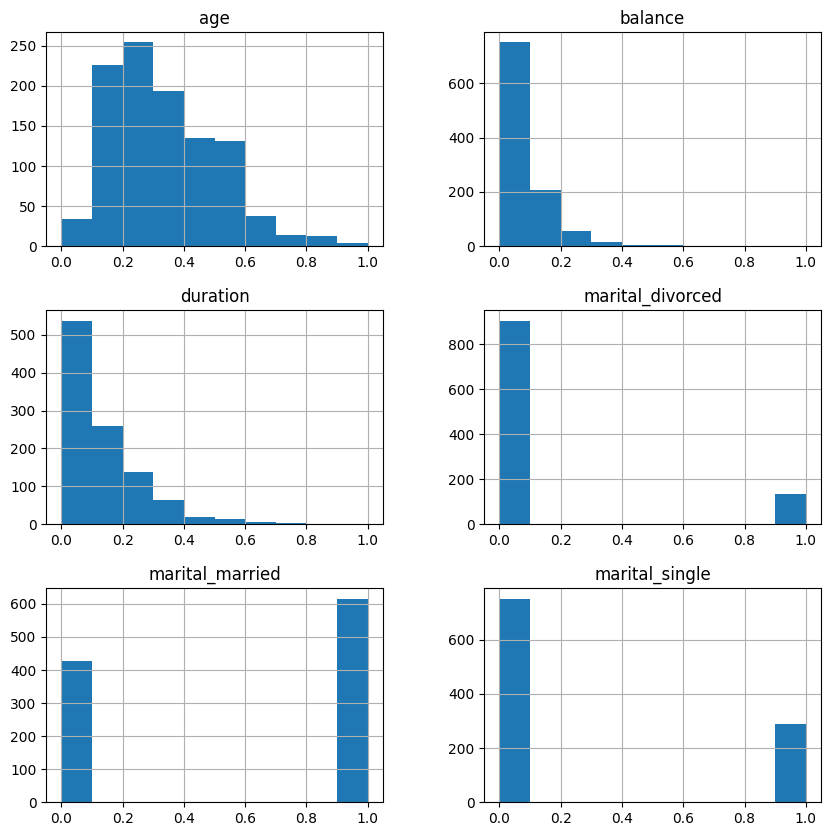

In [22]:
features.hist(figsize=(10,10));

#Train-Test Split


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
features

,age,balance,duration,marital_divorced,marital_married,marital_single
0,0.279412,0.103701,0.075697,0.0,1.0,0.0
1,0.279412,0.066448,0.085838,1.0,0.0,0.0
2,0.220588,0.058251,0.013763,0.0,1.0,0.0
3,0.602941,0.081447,0.137631,0.0,1.0,0.0
4,0.338235,0.063832,0.054328,0.0,1.0,0.0
...,...,...,...,...,...,...
1037,0.102941,0.068994,0.205723,0.0,0.0,1.0
1038,0.602941,0.058321,0.292648,0.0,1.0,0.0
1039,0.338235,0.083365,0.341543,0.0,0.0,1.0
1040,0.191176,0.067320,0.444042,0.0,0.0,1.0


In [25]:
target

0       0
1       0
2       0
3       0
4       0
       ..
1037    1
1038    1
1039    1
1040    1
1041    1
Name: target, Length: 1042, dtype: int64

In [53]:
F_trn, F_tst, T_trn, T_tst= train_test_split(features, target, train_size=0.65)

In [54]:
T_trn

568    1
368    0
40     0
433    0
847    1
      ..
265    0
781    1
403    0
267    0
927    1
Name: target, Length: 677, dtype: int64

In [55]:
F_trn.shape, T_trn.shape

((677, 6), (677,))

In [56]:
F_tst.shape, T_tst.shape

((365, 6), (365,))

In [57]:
F_trn

,age,balance,duration,marital_divorced,marital_married,marital_single
568,0.426471,0.188671,0.140891,1.0,0.0,0.0
368,0.323529,0.072901,0.153568,0.0,1.0,0.0
40,0.191176,0.055670,0.018834,0.0,1.0,0.0
433,0.279412,0.223307,0.049620,0.0,1.0,0.0
847,0.367647,0.082598,0.065194,0.0,1.0,0.0
...,...,...,...,...,...,...
265,0.588235,0.127943,0.007968,0.0,1.0,0.0
781,0.132353,0.044089,0.069178,0.0,0.0,1.0
403,0.352941,0.051519,0.073524,1.0,0.0,0.0
267,0.176471,0.050473,0.136545,1.0,0.0,0.0


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# -- initialize the model
logreg = LogisticRegression()

In [58]:
logreg.fit(F_trn, T_trn)

LogisticRegression()

In [29]:
logreg.coef_

array([[ 1.28185231,  0.87628753,  7.25857348,  0.03068071, -0.32548436,
         0.29485766]])

In [30]:
logreg.intercept_

array([-1.3505002])

In [59]:
logreg.predict(F_trn)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [61]:
P_tst=logreg.predict(F_tst)

In [63]:
P_tst.shape

(365,)

In [64]:
P_tst

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [65]:
prediction = logreg.predict(F_trn)

In [33]:
(prediction == target).sum() / len(target)

0.7236084452975048

# Model Evaluation

In [34]:
# -- metrics
from sklearn.metrics import classification_report

In [69]:
print(classification_report(T_trn, T_tst))

ValueError: ignored

In [36]:
target_names = ["No Buy", "Buy"]
print(classification_report(target, prediction, target_names=target_names))

              precision    recall  f1-score   support

      No Buy       0.69      0.82      0.75       521
         Buy       0.78      0.63      0.69       521

    accuracy                           0.72      1042
   macro avg       0.73      0.72      0.72      1042
weighted avg       0.73      0.72      0.72      1042



In [37]:
# -- confusion matrics
from sklearn.metrics import confusion_matrix

confusion_matrix(target, prediction)

array([[426,  95],
       [193, 328]])

In [38]:
cnf_matrix = confusion_matrix(target, prediction)

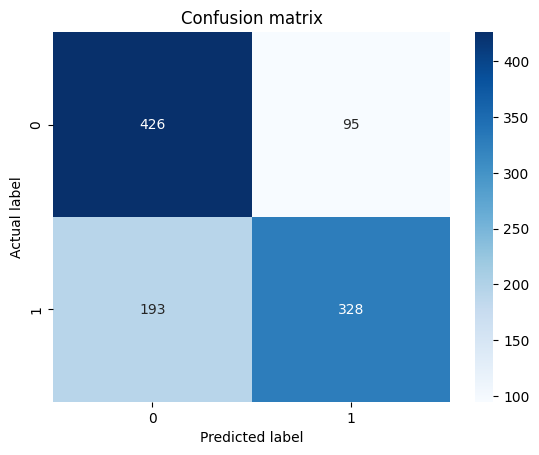

In [39]:
import seaborn as sns
import pylab as plt

sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d');
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

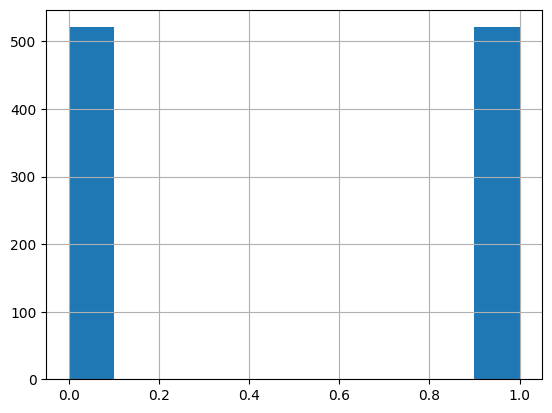

In [40]:
# -- is this good?

target.hist();

In [41]:
(target == 0).sum()

521

In [42]:
(target == 1).sum()

521

In [43]:
(target == 0).sum() / len(target)

0.5